In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
import tensorflow as tf

In [127]:
data = pd.read_csv(r'C:\Users\rivoi\Documents\M2MAD\SPLEX\Free project\survey.csv')

data.info()
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']

for feature in data:
    if feature in stringFeatures:
        data[feature] = data[feature].fillna('NaN')


data = data.drop(['state'],axis = 'columns' )
data = data.drop(['comments'],axis = 'columns'  )
data = data.drop(['Timestamp'],axis = 'columns'  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [129]:
unkwown = ["A little about you","p",'Nah']
data = data[~data['Gender'].isin(unkwown)]

list_genre=data['Gender'].unique()
print(list_genre)

man=['M', 'Male', 'male', 'm', 'maile','Cis Male' ,'Mal','Male (CIS)', 'Make', 'Male ','Man' , 'msle' ,'Mail', 'cis male', 'Malr' , 'Cis Man']

woman=['Female', 'female' ,'Cis Female', 'F',  'Woman', 'f', 'Femake' ,'Female ', 'Androgyne', 'cis-female/femme','Female (cis)' , 'femail','woman']

trans=[ 'Male-ish', 'Trans-female' ,'something kinda male?', 'queer/she/they', 'non-binary' ,'All', 'Enby', 'fluid' ,'Genderqueer' ,'Agender','Guy (-ish) ^_^', 'male leaning androgynous' ,'Trans woman' ,'Neuter' ,'Female (trans)' ,'queer','ostensibly male, unsure what that really means']

for (row,col) in data.iterrows():
    if col.Gender in man:
        data['Gender'].replace(to_replace=col.Gender, value = 'M', inplace=True)
    elif col.Gender in woman:
        data['Gender'].replace(to_replace=col.Gender, value = 'F', inplace=True)
    elif col.Gender in trans:
        data['Gender'].replace(to_replace=col.Gender, value = 'T', inplace=True)

['F' 'M' 'T']


C:\Users\rivoi\AppData\Local\Temp\ipykernel_21220\2308086504.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace(to_replace=col.Gender, value = 'F', inplace=True)
C:\Users\rivoi\AppData\Local\Temp\ipykernel_21220\2308086504.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Age
 29             84
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 329             1
 58              1
 62              1
 65              1
-29              1
-1726            1
 5               1
 53              1
 61              1
 11              1
 72              1
Name: count, dtype: int64
c

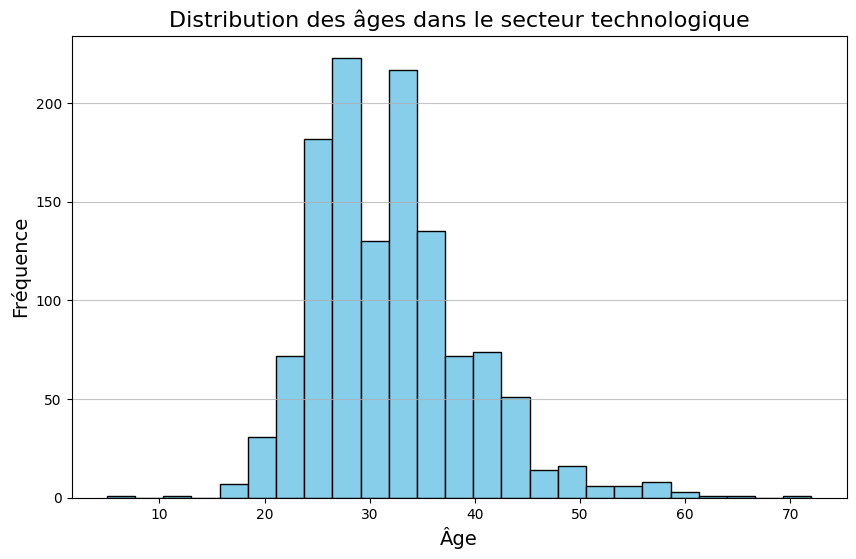

In [ ]:
# Data exploration 
data.fillna(data['Age'].median(),inplace=True)
age =data['Age']

print(age.value_counts())  

# Filtrer les âges dans une plage raisonnable
age_cleaned = age[(age >= 0) & (age <= 120)]


print(age_cleaned.describe())

plt.figure(figsize=(10, 6))
plt.hist(age_cleaned, bins=25, color='skyblue', edgecolor='black')
plt.title('Distribution des âges dans le secteur technologique', fontsize=16)
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [91]:
#age correction

#print(data['Age'].unique())

data.fillna(data['Age'].median(),inplace=True)

s = pd.Series(data['Age'])
s[s<18] = data['Age'].median()
data['Age'] = s
s = pd.Series(data['Age'])
s[s>120] = data['Age'].median()
data['Age'] = s

data['age_range'] = pd.cut(data['Age'], [0,25,50,75], labels=["0-25","26-50","51-75"], include_lowest=True)

#print(data['Age'].unique())

In [92]:
data['self_employed'] = data['self_employed'].replace('NaN', 'No')
#print(data['self_employed'].unique())


data['work_interfere'] = data['work_interfere'].replace('NaN', 'Don\'t know' )
#print(data['work_interfere'].unique())

#print(data['Country'].unique())

print(data)

      Age Gender         Country self_employed family_history treatment  \
0      37      F   United States            No             No       Yes   
1      44      M   United States            No             No        No   
2      32      M          Canada            No             No        No   
3      31      M  United Kingdom            No            Yes       Yes   
4      31      M   United States            No             No        No   
...   ...    ...             ...           ...            ...       ...   
1254   26      M  United Kingdom            No             No       Yes   
1255   32      M   United States            No            Yes       Yes   
1256   34      M   United States            No            Yes       Yes   
1257   46      F   United States            No             No        No   
1258   25      M   United States            No            Yes       Yes   

     work_interfere    no_employees remote_work tech_company  ...  \
0             Often           

In [93]:
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#print(data['Country'].unique())

print(data.keys())

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['F', 'M', 'T']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5

      Gender  Country  self_employed  family_history  work_interfere  \
0          0       44              0               0               2   
1          1       44              0               0               3   
2          1        6              0               0               3   
3          1       43              0               1               2   
4          1       44              0               0               1   
...      ...      ...            ...             ...             ...   
1254       1       43              0               0               0   
1255       1       44              0               1               2   
1256       1       44              0               1               4   
1257       0       44              0               0               0   
1258       1       44              0               1               4   

      no_employees  remote_work  tech_company  benefits  care_options  ...  \
0                4            0             1         2  

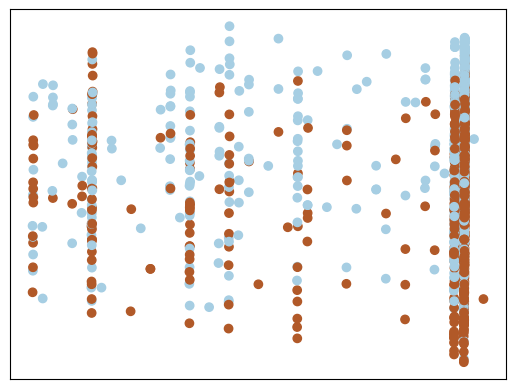

In [94]:

features =  ['Gender', 'Country', 'self_employed', 'family_history',
        'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range']

label='treatment'

X=data[features]
Y=data.treatment

print(X,Y)

print(data['mental_health_interview'].unique())



0.7876955903271693


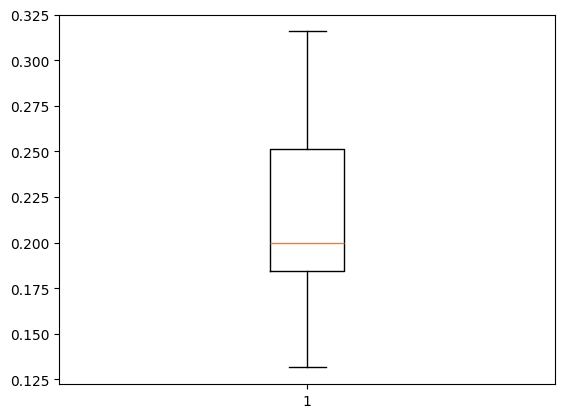

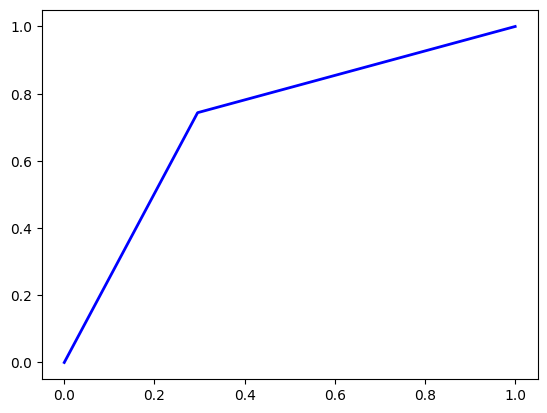

In [95]:
#Decision tree
D={}
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
scores=cross_val_score(clf,X_test,Y_test,cv=10)
print(scores.mean())
plt.boxplot(1-scores)
plt.show()
D['DecisionTree']=scores.mean()*100


y_pred=clf.predict_proba(X_test)[:,1]
y_pred=y_pred.reshape(-1,1)
roc=roc_auc_score(Y_test,y_pred)

# Courbe ROC

roc
fpr1, tpr1, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fpr1, tpr1, color='blue', linewidth=2, label='ROC Curve')

0.8489331436699858


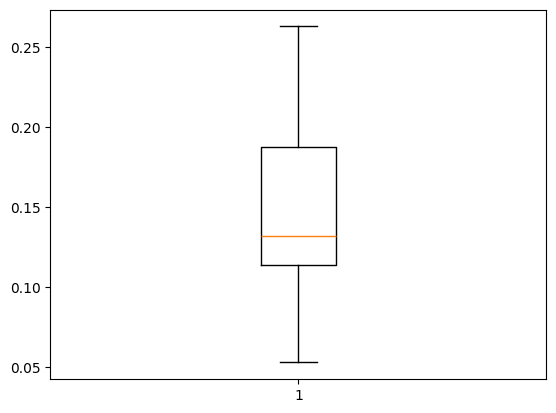

                      Feature  Gini Importance
4              work_interfere         0.409979
3              family_history         0.088571
9                care_options         0.053372
1                     Country         0.039837
5                no_employees         0.036540
8                    benefits         0.033709
13                      leave         0.030227
0                      Gender         0.029348
16                  coworkers         0.026626
14  mental_health_consequence         0.026419
19      phys_health_interview         0.023884
12                  anonymity         0.023043
20         mental_vs_physical         0.021079
21            obs_consequence         0.020532
17                 supervisor         0.020114
11                  seek_help         0.019627
10           wellness_program         0.018780
15    phys_health_consequence         0.018529
22                  age_range         0.014186
18    mental_health_interview         0.012998
6            

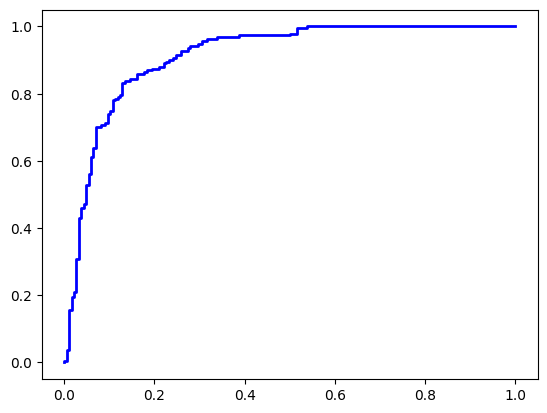

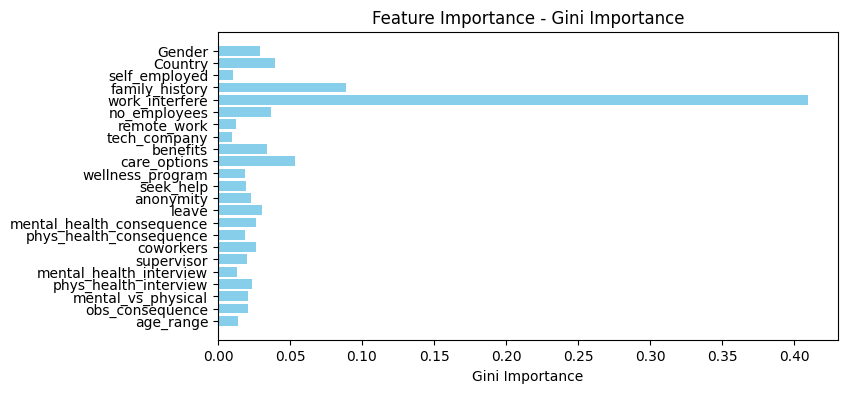

In [108]:

# Random forest
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf = clf.fit(X_train, Y_train)
scores=cross_val_score(clf,X_test,Y_test,cv=10)
print(scores.mean())
plt.boxplot(1-scores)
plt.show()
D['RandomForest']=scores.mean()*100


y_pred=clf.predict_proba(X_test)[:,1]
y_pred=y_pred.reshape(-1,1)
roc=roc_auc_score(Y_test,y_pred)

# Courbe ROC
roc
fpr2, tpr2, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fpr2, tpr2, color='blue', linewidth=2, label='ROC Curve')

# Calcul Feature importance
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

# Barplot pour feature importance
plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  
plt.show()


C:\Users\rivoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rivoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

0.7988620199146516


C:\Users\rivoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


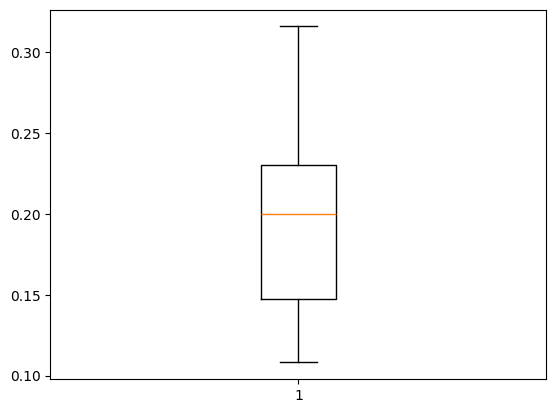

79.88620199146516


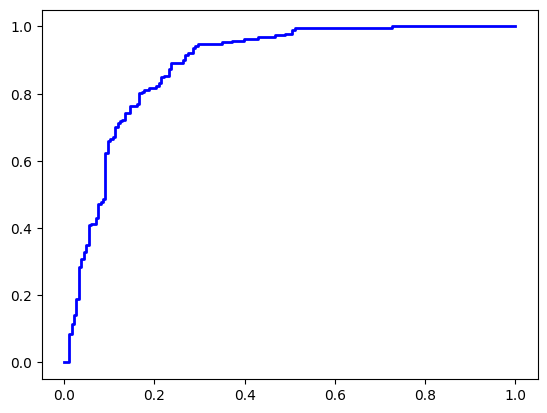

In [97]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
    
y_pred_class = logreg.predict(X_test)
scores=cross_val_score(logreg,X_test,Y_test,cv=10)
print(scores.mean())
plt.boxplot(1-scores)
plt.show()
D['LogReg']=scores.mean()*100
print(D['LogReg'])
y_pred=logreg.predict_proba(X_test)[:,1]
y_pred=y_pred.reshape(-1,1)
roc=roc_auc_score(Y_test,y_pred)

# Courbe ROC

roc
fpr3, tpr3, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fpr3, tpr3, color='blue', linewidth=2, label='ROC Curve')

0.80099573257468


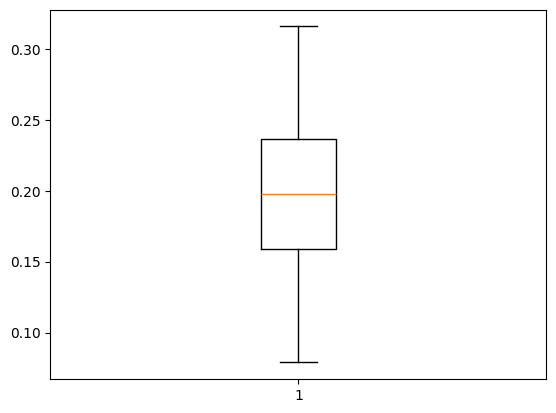

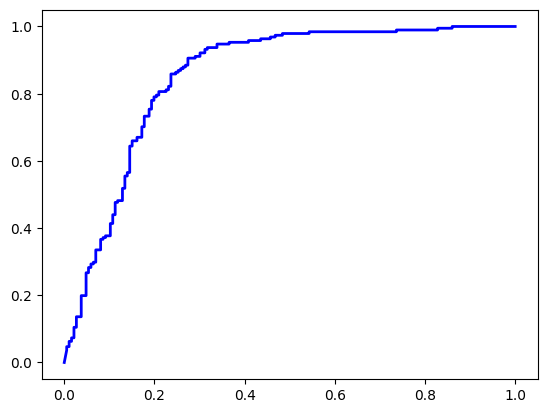

In [98]:
#KNN

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
clf = KNeighborsClassifier(n_neighbors=15, weights='distance')
clf = clf.fit(X_train, Y_train)
scores=cross_val_score(clf,X_test,Y_test,cv=10)
print(scores.mean())
plt.boxplot(1-scores)
plt.show()
D['KNN']=scores.mean()*100

y_pred=clf.predict_proba(X_test)[:,1]
y_pred=y_pred.reshape(-1,1)
roc=roc_auc_score(Y_test,y_pred)

# Courbe ROC

roc
fpr4, tpr4, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fpr4, tpr4, color='blue', linewidth=2, label='ROC Curve')

0.812291013584117
0.7758751306165099
0.803200104493208
770     1
915     1
1185    0
998     0
351     1
       ..
1044    1
100     1
1012    0
182     0
332     0
Name: treatment, Length: 377, dtype: int32


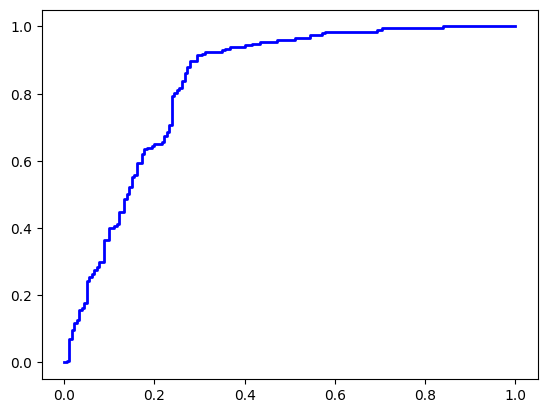

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=99)

# SVM 
linear_SVM = svm.SVC(kernel='linear', C=1,probability=True)
linear_SVM.fit(X_train,y_train)
scores = cross_val_score(linear_SVM, X_train, y_train, cv=10)
print(scores.mean())
D['SVM (linear)']=scores.mean()*100

clf = svm.SVC(kernel='poly', C=1)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(scores.mean())

clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(scores.mean())

y_pred=linear_SVM.decision_function(X_test)
y_pred=y_pred.reshape(-1,1)
roc=roc_auc_score(Y_test,y_pred)

# Courbe ROC (pour SVM avec Kernel linéaire seulement car il donne la meilleur précision)

print( y_test)
roc
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr5, tpr5, color='blue', linewidth=2, label='ROC Curve')

In [ ]:
# Reconstruction BN avec pyAgrum
data.to_csv("survey_data.csv",index=False)

import pyAgrum as gum
import pyAgrum.lib.image as gumimage
learner=gum.BNLearner('survey_data.csv')
learner.useLocalSearchWithTabuList()
bn=learner.learnBN()
print(bn)
gumimage.export(bn, 'C:/Users/rivoi/Documents/M2MAD/SPLEX/Free project/image.pdf')


BN{nodes: 25, arcs: 28, domainSize: 10^13.9873, dim: 367, mem: 4Ko 16o}


In [101]:
# Parametres de DNN

batch_size = 75
train_steps = 10000

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)



Epoch 1/10


C:\Users\rivoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5118 - loss: 0.7296
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6008 - loss: 0.6678 
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6563 - loss: 0.6331 
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7022 - loss: 0.5701 
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7452 - loss: 0.5200 
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8133 - loss: 0.4473 
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8029 - loss: 0.4287 
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7807 - loss: 0.4579 
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8093 - loss: 0.4270 
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8016 - loss: 0.4324 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7619 - loss: 0.4750  
Perte : 0.429902046918869, Précision : 0.8010610342025757
Epoch 1/10
12/12 ━━━━━━━━━━━

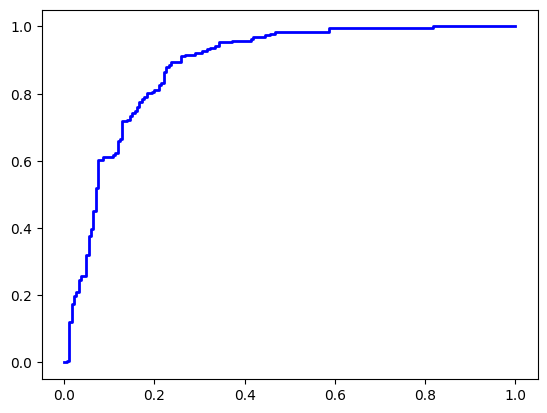

In [102]:
# DNN

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

# Définir le modèle
model = Sequential([
    Dense(10, activation='relu', input_shape=(23,)),  
    Dense(10, activation='relu'), 
    Dense(1, activation='sigmoid')  
])

# Définir l'optimizer adam optimizer
optimizer1 = Adam(learning_rate=0.01)

# Compilation du modèle
model.compile(optimizer=optimizer1,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement
model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

# Évaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perte : {loss}, Précision : {accuracy}")

# Définir l'optimizer Gradient descent
optimizer2 = SGD(learning_rate=0.01)

# Compilation du modèle
model.compile(optimizer=optimizer2,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement
model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

# Évaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perte : {loss}, Précision : {accuracy}")

y_pred=model.predict(X_test).ravel()
y_pred=y_pred.reshape(-1,1)

D['Neural Net']=accuracy*100
D
roc
fpr6, tpr6, thresholds2 = roc_curve(Y_test, y_pred)
rocDNN = plt.plot(fpr6, tpr6, color='blue', linewidth=2, label='ROC Curve')

C:\Users\rivoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rivoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Précision d'Adaboost : 0.8567639257294429


C:\Users\rivoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rivoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rivoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

Précision moyenne (validation croisée) : 0.8296063492063492
[0.51025977 0.51325603 0.46819607 0.48925729 0.50431625 0.51636197
 0.48819921 0.47039527 0.5093501  0.50109879 0.50106382 0.50949425
 0.51139202 0.50341043 0.46984968 0.50636092 0.50860954 0.50773865
 0.46990102 0.47358466 0.50374914 0.4905378  0.50979058 0.51023911
 0.49172122 0.50664718 0.48631039 0.48709551 0.50801648 0.50066069
 0.51218926 0.5079266  0.48977692 0.51687871 0.49865143 0.50397765
 0.51372467 0.50283121 0.50607149 0.47388909 0.48906541 0.4732096
 0.50698578 0.49040821 0.47741044 0.49891079 0.47064706 0.51392581
 0.4978031  0.50206352 0.51899612 0.46604235 0.50079699 0.51398628
 0.51374953 0.50045521 0.50425426 0.48992226 0.50409995 0.49860789
 0.50311117 0.50744844 0.48821095 0.51411375 0.51363657 0.50705509
 0.51318337 0.50963924 0.50729464 0.51594591 0.50438284 0.51208867
 0.46922981 0.48478655 0.48557702 0.47211747 0.51228559 0.47008648
 0.51729629 0.4998212  0.49844451 0.50544108 0.48656066 0.5087344
 0.5

C:\Users\rivoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


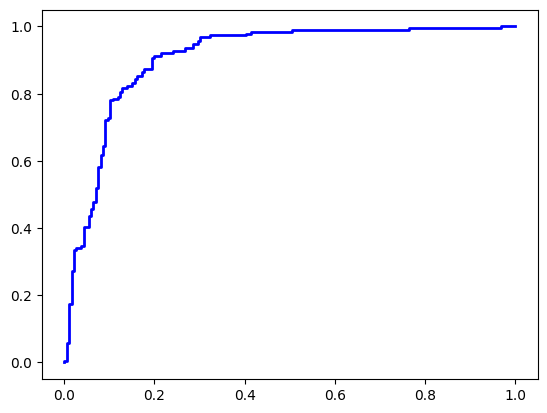

In [103]:
# Adaboost 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Créer le modèle Adaboost
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  
    n_estimators=50,  
    learning_rate=1.0  
)

# Entraîner le modèle
adaboost_model.fit(X_train, y_train)

# Évaluation
y_pred = adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision d'Adaboost : {accuracy}")


scores = cross_val_score(adaboost_model, X, Y, cv=10)
print(f"Précision moyenne (validation croisée) : {scores.mean()}")

D['ADA BOOST']=scores.mean()*100


y_pred=adaboost_model.predict_proba(X_test)[:,1]
print(y_pred)
y_pred=y_pred.reshape(-1,1)
roc=roc_auc_score(y_test,y_pred)
# Courbe ROC

roc
fpr7, tpr7, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr7, tpr7, color='blue', linewidth=2, label='ROC Curve')

Précision de XGBoost : 0.8328912466843501
Précision moyenne (validation croisée) : 0.8216507936507936


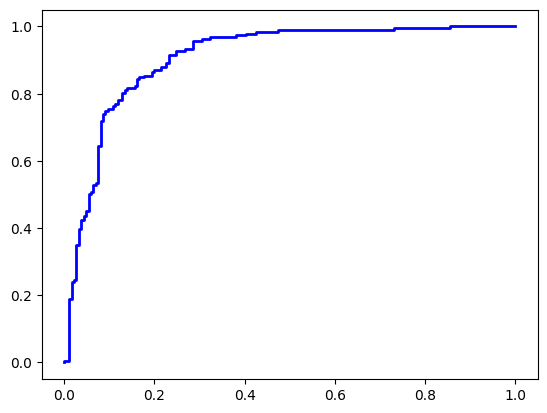

In [104]:
# xGboost 

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Créer le modèle XGBoost
xgboost_model = XGBClassifier(
    n_estimators=100,  
    learning_rate=0.1,  
    max_depth=3,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42  )

# Entraîner le modèle
xgboost_model.fit(X_train, y_train)

# Évaluation
y_pred = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision de XGBoost : {accuracy}")

scores = cross_val_score(xgboost_model, X, Y, cv=10)
print(f"Précision moyenne (validation croisée) : {scores.mean()}")

D['xGboost']=scores.mean()*100

y_pred=xgboost_model.predict_proba(X_test)[:,1]
y_pred=y_pred.reshape(-1,1)
roc=roc_auc_score(y_test,y_pred)

# Courbe ROC

roc
fpr8, tpr8, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr8, tpr8, color='blue', linewidth=2, label='ROC Curve')

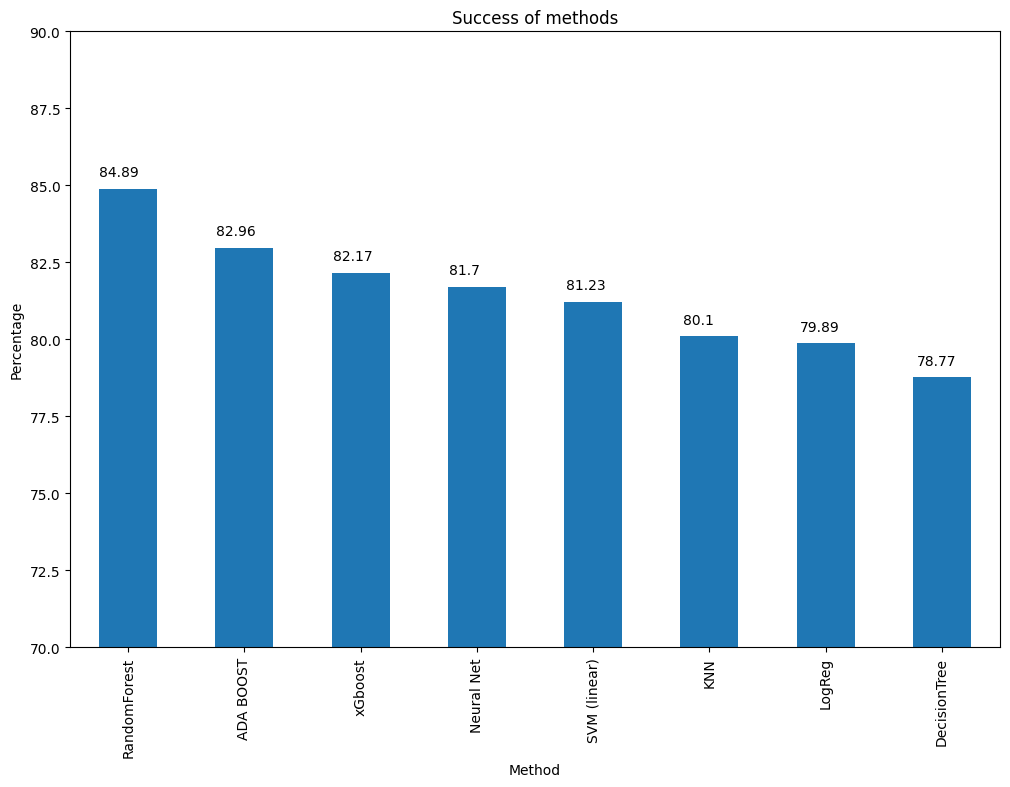

In [ ]:
# Plot la précision des différents méthodes
D
def plotSuccess():
    s = pd.Series(D)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

plotSuccess()

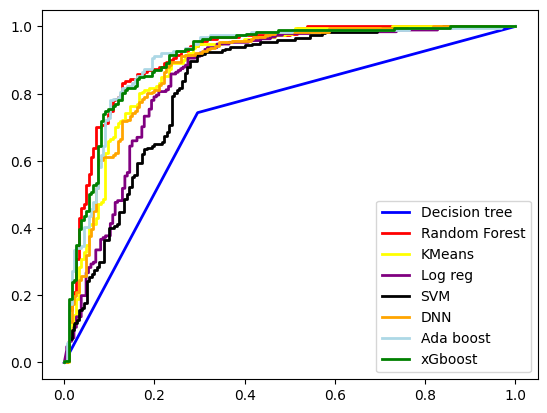

In [ ]:
#Un seul plot des roc curve 
plt.plot(fpr1, tpr1, color='blue', linewidth=2, label='Decision tree')
plt.plot(fpr2, tpr2, color='red', linewidth=2, label='Random Forest')
plt.plot(fpr3, tpr3, color='yellow', linewidth=2, label='KMeans')
plt.plot(fpr4, tpr4, color='purple', linewidth=2, label='Log reg')
plt.plot(fpr5, tpr5, color='black', linewidth=2, label='SVM')
plt.plot(fpr6, tpr6, color='orange', linewidth=2, label='DNN')
plt.plot(fpr7, tpr7, color='lightblue', linewidth=2, label='Ada boost')
plt.plot(fpr8, tpr8, color='green', linewidth=2, label='xGboost')
plt.legend()
plt.show()